# Effects of temperature on microbial carbon use efficiency

Danica Duan  
Emma Cavan, Tom Clegg, Samraat Pawar

## Introduction

## The Model
Adapted from [Emma Cavan](https://nbviewer.jupyter.org/github/e-cavan/Bacteria_Model/blob/master/Code/Consumer_Resource_Model.ipynb)'s model of the impact of chemical pollution on microbial communities. Originated from [Marsland et al. (2019)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006793) with [Tom Clegg](https://nbviewer.jupyter.org/github/CleggTom/Bacteria_EcoFunc/blob/master/notebooks/Metabolic_model.ipynb) making the first version.  

Further adapted to monitor microbial carbon use efficiency over time with different temperature. 

### Equations
#### General Model
Growth rate (biomass) of species i on resource j: 
\begin{equation}
dC_i/dt = C_i\Bigl(\sum_{j=1}^{M}U_{ij}s_j(1-\sum_{k=1}^{M}l_{jk}) - R_i\Bigl)
\end{equation}

Concentration dynamic of resource j:
\begin{equation}
dS_j/dt = \rho_j - \sum_{i=1}^{N}\Bigl(C_iU_{ij}s_j-\sum_{k=1}^{M}C_iU_{ik}s_kl_{kj}\Bigl)
\end{equation}

Type 2: Monod equation
\begin{equation}
s_j = \frac{S_j}{K_j + S_j}
\end{equation}




| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $M$ | Number of resources | - | User defined |
| $N$ | Number of species | - | User defined |
| $C_i$ | Bacteria population of species i | g/mL | 0.1 |
| $S_j$ | Concentration of resource j | g/mL | 0.1 |
| $K_j$ | Half saturation constant | g/mL | 0.5? |
| $U_{ij}$ | Uptake of resource j by species i | - | Temperature & size dependant |
| $R_i$ | Respiration of species i | - | Temperature & size dependant |
| $l_{jk}$ | Leakage: proportion of resource j converted to resource k | - | 0.4? (Temperature-dependant?) |
| $\rho_j$ | Supply of resource j | g/mL | 1 |

###### Description: 
Generally speaking, the growth rate of speices i is calculated by the actual uptake of all resources by that species minus carbon loss through respiration:

\begin{equation}
\frac{1}{C_i}\frac{dC_i}{dt} = U_i - R_i
\end{equation}


The actual uptake by species i is calculated as follow, where $U_{ij}$ is the per biomass uptake rate of resource j by species i; $s_j$ is the Monod equation considering the concentration of resources (resource avalibility):

\begin{equation}
U_i = \sum_{j=1}^{M}U_{ij}s_j
\end{equation}

$l_{jk}$ represents the percentage of resources consumed but was transformed and released into the environment as another resource. 

In the resource model, the resource dynamic of the system is calculated by the external input of each resource which is constant through time as $\rho_j$, minus the uptake of $U_j$ by all species, and plus the internal supply by the conversion of other resources: 

\begin{equation}
\frac{dS_j}{dt} = \rho_j - U_j + L_j
\end{equation}


For each species i, the total uptake rate of resource j (not considering the release of k) is $C_iU_{ij}s_j$. 

The release of converted j from k is calculated by the uptake and leakage of resource k.  

\begin{equation}\label{eq:}
L_j = \sum_{k=1}^{M}C_iU_{ik}s_kl_{kj}
\end{equation}



#### Size and Temperature Dependency
\begin{equation}
U_{ij} = B_{U}m^{-1/4} \times {e^{\frac{-Ea_U}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}
\end{equation}

\begin{equation}
R_i = B_{R}m^{-1/4} \times {e^{\frac{-Ea_R}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}
\end{equation}

| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $B$ | Normalisation constant | - | ? |
| $m$ | Mass | g | 1 |
| $Ea$ | Activation energy | eV | ? |
| $k$ | Boltsmann constant | eV/K | $8.62$ $\times 10^{-5}$ |
| T | Temperature | K | User defined |
| $T_{ref}$| Reference temperature | K | 273.15 |

With modified Schoolfield ([Kontopoulos et al., 2020](https://onlinelibrary.wiley.com/doi/full/10.1111/evo.13946)): 
\begin{equation}
U_{ij} = \frac{B_{U}m^{-1/4} \times {e^{\frac{-Ea_U}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}}{1 + \frac{Ea_U}{E_{DU}-Ea_U}e^{\frac{E_{DU}}{k}\cdot(\frac{1}{T_{pk}}-\frac{1}{T_{ref}})}}
\end{equation}

\begin{equation}
R_i = \frac{B_{R}m^{-1/4} \times {e^{\frac{-Ea_R}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}}{1 + \frac{Ea_R}{E_{DU}-Ea_R}e^{\frac{E_{DR}}{k}\cdot(\frac{1}{T_{pk}}-\frac{1}{T_{ref}})}}
\end{equation}

| Parameter symbol | Parameter name | Units | Initial value |
|---|---|---|---|
| $E_D$ | High temperature deactivation energy | eV | 3.5? (Should be different for U and R?) |
| $T_{pk}$ | Temperature of peak rate | K | 293.15? (Should be different for species and U & R?)

#### Carbon Use Efficiency

Percentage of carbon assimilated, calculated by growth rate over total actual uptake at each time point:

\begin{equation}
CUE_i = \frac{dC_i/dt}{\sum \limits _{j=1}^{M}U_{ij}s_j}
\end{equation}


## Simulation

- Extincted species are detected and replaced (concentration < 0.01 g/mL).
- Steady state is reached when no concentration change within 50 time steps. 
- CUE is calculated at each time step for each consumer. 

### Example uptake and leakage matrix at 21 C (10 consumers, 5 resources)

- Uptake: assuming each consumer has one single temperature response curve which controls the total uptake of all resources. The resources uptake by each consumer are averagely and randomly distributed, which sum up to the total value calculated by the size and temperature dependency function (currently still using Arrehnius and parameters from Emma). 
- leakage(the conversion of resource j to k): the total conversion effecient of each resource is 0.4, which is averagely distributed among all resources it converted to. Assuming no resources can be converted back, so the lower diagnol is set to be 0. 

In [43]:
import parameters as par
import size_temp_funcs as st
import numpy as np

N = 1 # Number of consumers
M = 1 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk = 20 # Peak above Tref, degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
k = 0.0000862 # Boltzman constant
T_pk = Tref + pk # Peak above Tref, Kelvin
T = 273.15 + 21 # Model temperature
Ea_U = np.round(np.random.normal(1.5, 0.01, N),3)[0:N] # Ea for uptake
Ea_R = Ea_U - 0.8 # Ea for respiration, which should always be lower than Ea_U so 'peaks' later
B_U = (10**(2.84 + (-4.96 * Ea_U))) + 4 # B0 for uptake - ** NB The '+4' term is added so B_U>> B_R, otherwise often the both consumers can die and the resources are consumed
B_R = (10**(1.29 + (-1.25 * Ea_R))) # B0 for respiration

U_sum = st.temp_growth(k, T, Tref, T_pk, N, B_U, Ma, Ea_U, Ea_D)
np.random.seed(0)
diri = np.transpose(np.random.dirichlet(np.ones(M),N))
U = np.transpose(diri*U_sum)
print(U_sum)
print(U)

[382.4364495  389.457456   403.88855458 400.23140311 366.54243019
 389.457456   375.54202589 376.68240336 382.4364495  378.97355841]
[[ 70.56614874 111.35699927  81.85750537  69.79712634  48.85866978]
 [ 52.95100223  29.35418345 113.41019314 169.07609766  24.66597953]
 [108.634567    52.11716945  58.12457658 179.91007039   5.10217115]
 [  6.70052317   1.50132264 131.38402164 110.67823871 149.96729694]
 [182.76365177  76.29714386  29.41775866  72.08105666   5.98281923]
 [ 74.43976868  11.27636795 210.93916452  53.77127212  39.03088274]
 [ 35.35523388 171.23645351  70.08014364  96.68769839   2.18249648]
 [ 52.55207519  51.76578722  52.45188008 157.3157996   62.59686127]
 [ 50.45102236  65.06070539 135.44861191   7.03400697 124.44210287]
 [181.73825897  38.65288546  22.58702625  62.01336855  73.98201917]]


In [44]:
import numpy as np

M = 5
np.random.seed(0)
l_raw = np.array([[np.random.normal(1/(i-1),0.005)* 0.4 if i-1>0 else np.random.normal(0.4, 0.005) for i in range(M,0,-1)] for i in range(1,M+1)])
fix = [[1 if j>i else 0 for j in range(M)] for i in range(M)]
fix[M-1][0] = 1
l = np.transpose(l_raw) * fix
print(l)
np.sum(l, axis = 1)

[[0.         0.09804544 0.10028809 0.10066735 0.09489402]
 [0.         0.         0.13624188 0.13632149 0.13464057]
 [0.         0.         0.         0.19958968 0.20172887]
 [0.         0.         0.         0.         0.39851567]
 [0.40933779 0.         0.         0.         0.        ]]


array([0.3938949 , 0.40720394, 0.40131856, 0.39851567, 0.40933779])

### Type II


#### 1 consumer, 1 resource

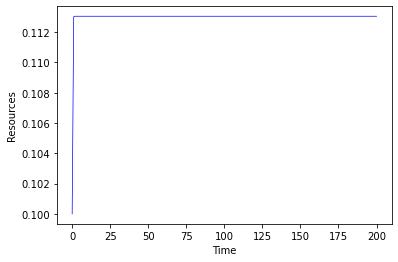

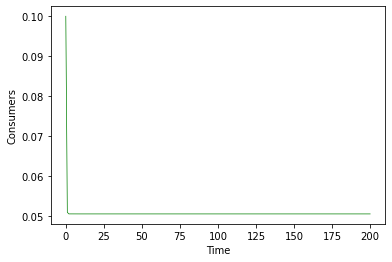

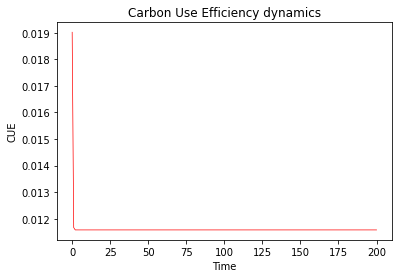

In [45]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 1 # Number of consumers
M = 1 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk = 20 # Peak above Tref, degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
t_n = 21 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 2 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 2 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)


########## Running Model ###########
ass_temp_run(t_fin, N, M, t_n,  Tref, Ma, ass, x0, pk, Ea_D, typ)

#### With only 20 C and 1 assembly (2 consumers, 1 resources)

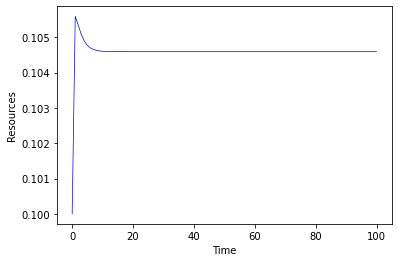

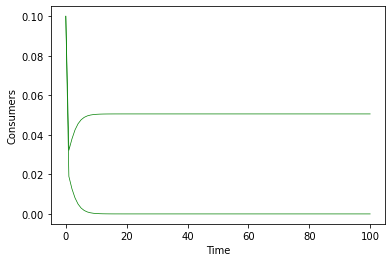

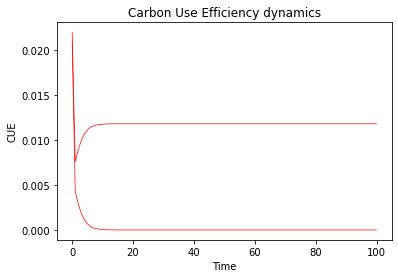

In [21]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 2 # Number of consumers
M = 1 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk = 20 # Peak above Tref, degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
t_n = 21 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 1 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 2 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)


########## Running Model ###########
ass_temp_run(t_fin, N, M, t_n,  Tref, Ma, ass, x0, pk, Ea_D, typ)

#### With 20&21 C, 2 assembly (2 consumers, 1 resources)

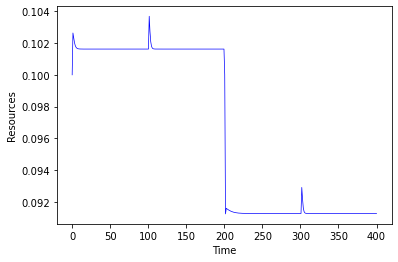

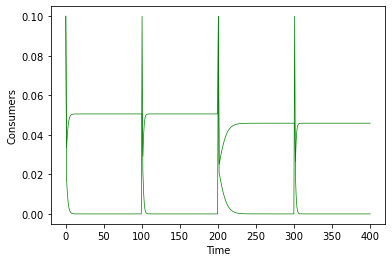

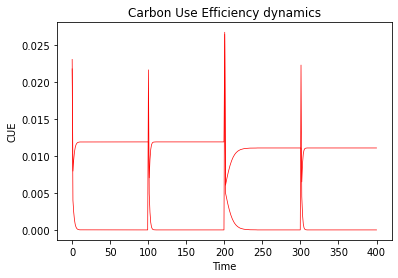

In [32]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 2 # Number of consumers
M = 1 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk = 20 # Peak above Tref, degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
t_n = 22 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 2 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 2 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
ass_temp_run(t_fin, N, M, t_n,  Tref, Ma, ass, x0, pk, Ea_D, typ)

#### With only 20 C and 1 assembly (20 consumers, 5 resources)

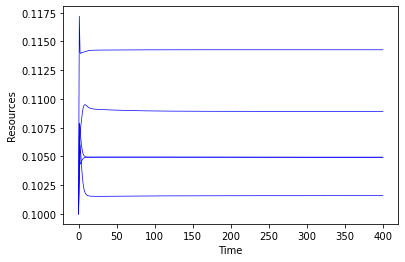

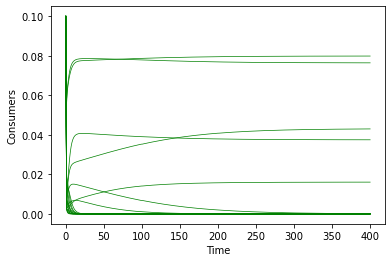

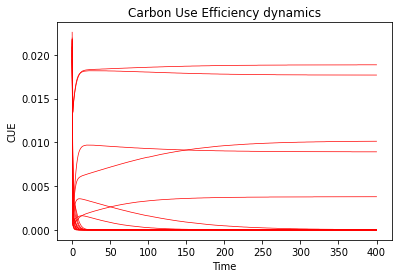

In [50]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 20 # Number of consumers
M = 5 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk = 20 # Peak above Tref, degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
t_n = 21 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 1 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 2 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
ass_temp_run(t_fin, N, M, t_n,  Tref, Ma, ass, x0, pk, Ea_D, typ)

#### With 20&21 C, 2 assembly (20 consumers, 5 resources)

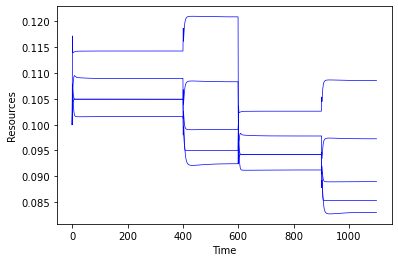

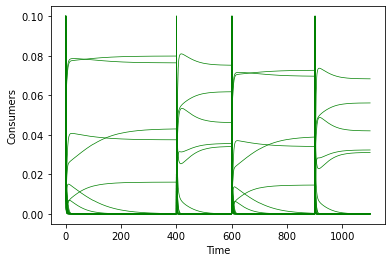

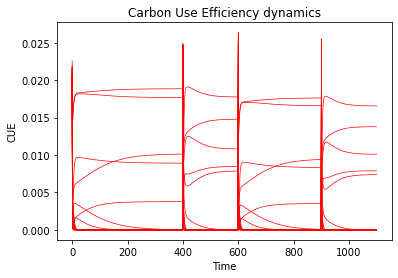

In [51]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 20 # Number of consumers
M = 5 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk = 20 # Peak above Tref, degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
t_n = 22 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 2 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 2 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
ass_temp_run(t_fin, N, M, t_n,  Tref, Ma, ass, x0, pk, Ea_D, typ)

### Type I

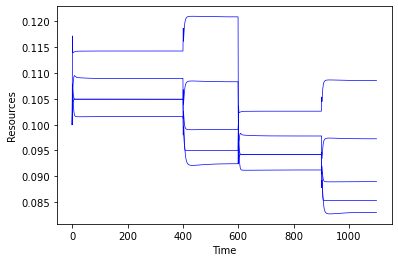

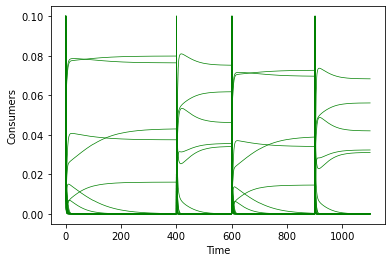

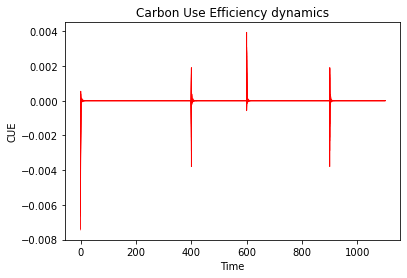

In [6]:
from Bacteria_vector_modular import ass_temp_run
import numpy as np

########## Setting Parameters ###########
N = 20 # Number of consumers
M = 5 # Number of resources

# Temperature params
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk = 20 # Peak above Tref, degrees C
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy
t_n = 22 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 2 # Assembly times at each temperature
t_fin = 100 # Number of time steps for each temperature
x0 = np.concatenate((np.full([N], (0.1)),np.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 1 # Functional response, Type I or II
K = 0.5 # Half saturation constant for Monod equation(Type II)

########## Running Model ###########
ass_temp_run(t_fin, N, M, t_n,  Tref, Ma, ass, x0, pk, Ea_D, typ)